### TASK TWO: CUSTOMER SEGMENTATION AND ANALYSIS

## By Pranay Dande

- Perform customer segmentation analysis on a retail dataset to identify distinct customer segments based on purchasing behavior. Use clustering techniques like K-means or DBSCAN to group customers and analyze segment characteristics.

In [24]:
# Import Basic Libraries

Context:
Libraries Used:

Key libraries include:
Numpy and Pandas: For data manipulation and processing.
Matplotlib and Seaborn: For data visualization.
Scipy and Sklearn: For clustering and hierarchical algorithms.
Plotly: For interactive visualizations.


The data is loaded from a file named Mall_Customers.csv.
Primary Goal:

Segment customers based on their purchasing behavior, demographics, or other metrics available in the dataset using clustering techniques like K-Means and Hierarchical Clustering.
Key Steps in the Notebook:

Data exploration and preprocessing.
Normalization/scaling of data for clustering.
Application of clustering algorithms (e.g., K-Means, Agglomerative).
Visualization of clustering results.



In [25]:
!pip install plotly
import plotly
print(plotly.__version__)


5.24.1


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings 
warnings.filterwarnings("ignore")

In [27]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [28]:
import sklearn
print(sklearn.__version__)


1.6.0


In [29]:
# Read Data

In [30]:
data=pd.read_csv(r"C:\Users\MYPC\Downloads\Mall_Customers.csv")

In [31]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
# Data Exploration && Analysis

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [36]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [37]:
data=data.drop('CustomerID',axis=1)

In [38]:
data.shape

(200, 4)

In [39]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

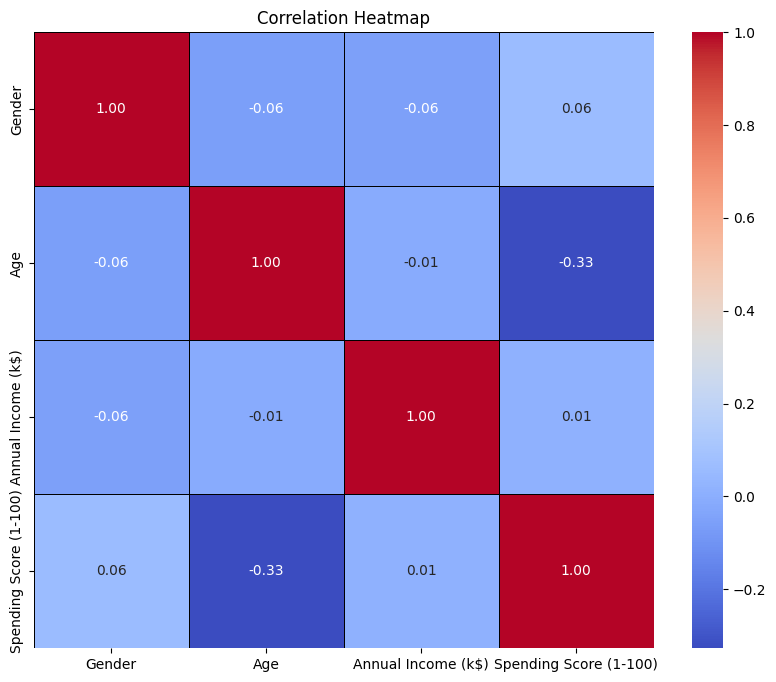

In [40]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

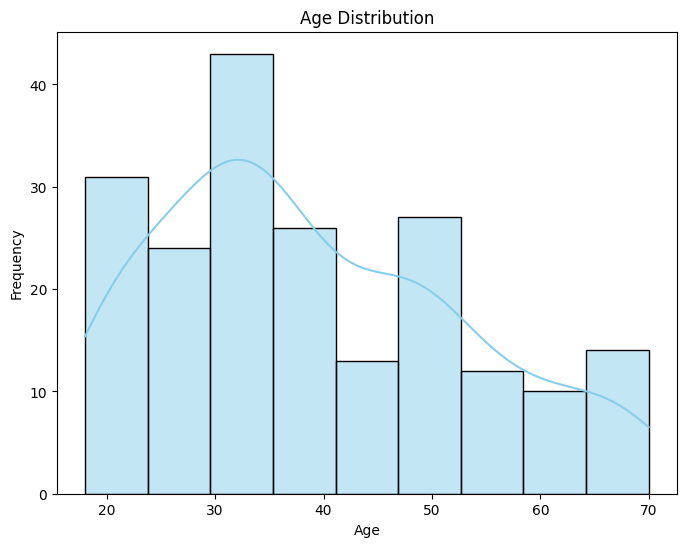

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

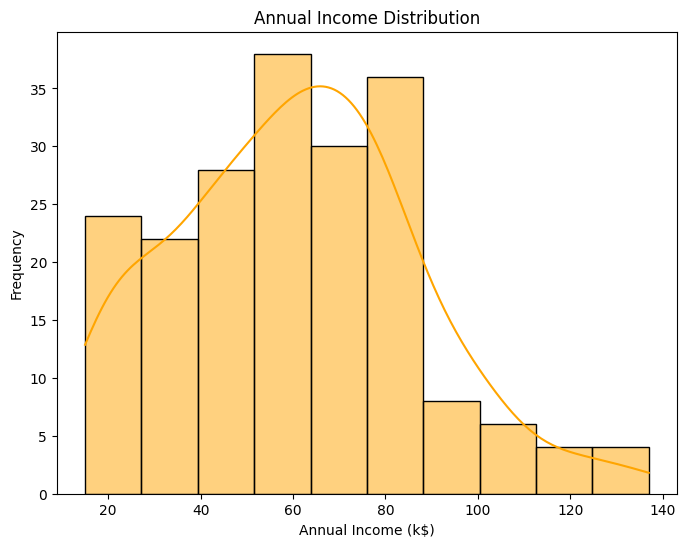

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Annual Income (k$)'], kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

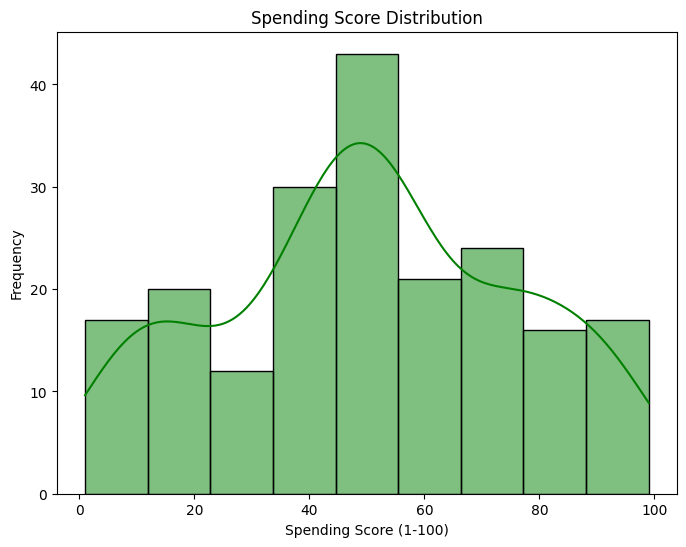

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

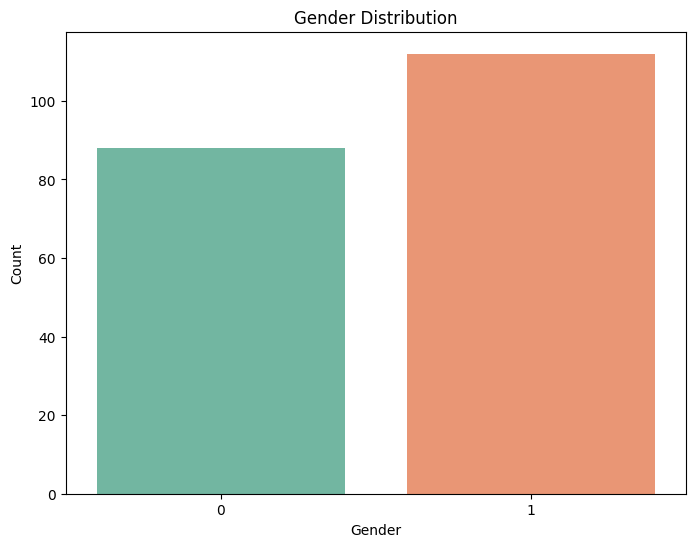

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

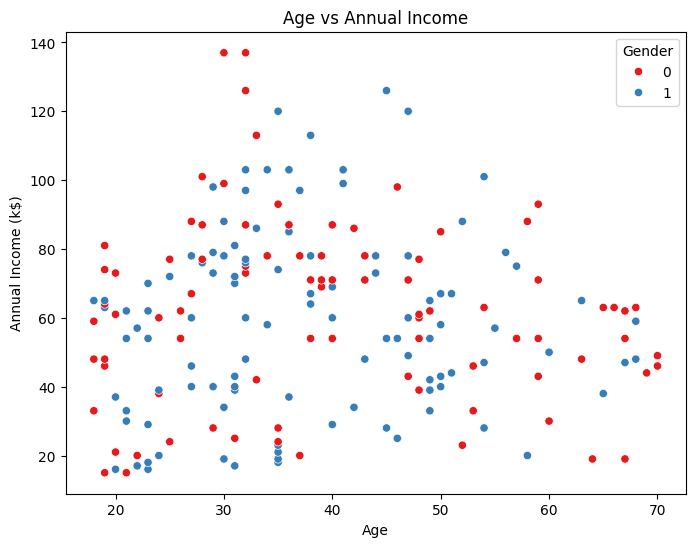

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue='Gender', palette='Set1')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

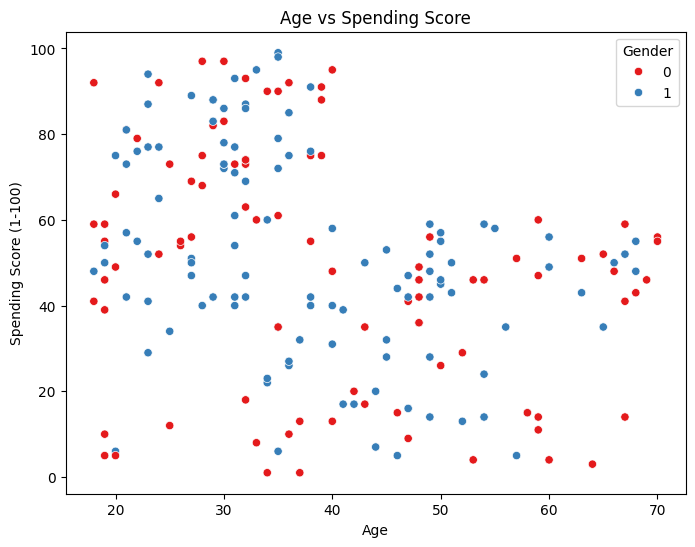

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

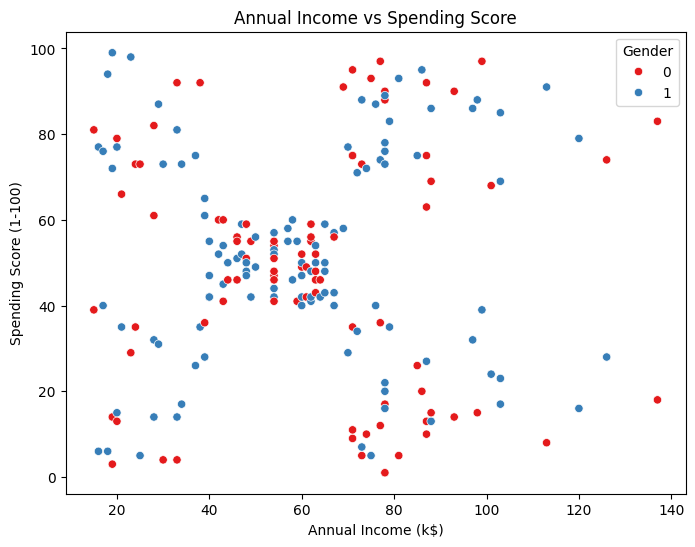

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender', palette='Set1')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [48]:
fig = px.scatter(data, 
                 x="Age", 
                 y="Annual Income (k$)", 
                 color="Gender", 
                 hover_data=["Age", "Annual Income (k$)"], 
                 title="Age vs Annual Income", 
                 labels={"Age": "Age", "Annual Income (k$)": "Annual Income (k$)"})
fig.show()

In [49]:
fig = px.scatter(data, 
                 x="Age", 
                 y="Spending Score (1-100)", 
                 color="Gender", 
                 hover_data=["Age", "Spending Score (1-100)"], 
                 title="Age vs Spending Score", 
                 labels={"Age": "Age", "Spending Score (1-100)": "Spending Score"})
fig.show()

In [50]:
fig = px.scatter(data, 
                 x="Annual Income (k$)", 
                 y="Spending Score (1-100)", 
                 color="Gender", 
                 hover_data=["Annual Income (k$)", "Spending Score (1-100)"], 
                 title="Annual Income vs Spending Score", 
                 labels={"Annual Income (k$)": "Annual Income (k$)", "Spending Score (1-100)": "Spending Score"})
fig.show()


In [51]:
X = data.iloc[:,[2, 3]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [52]:
wcss = [KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X).inertia_ for i in range(1, 11)]

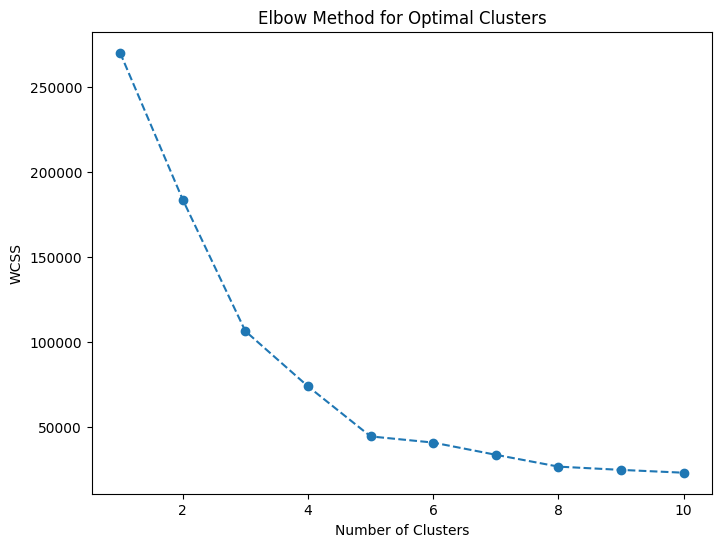

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
data['Cluster'] = labels

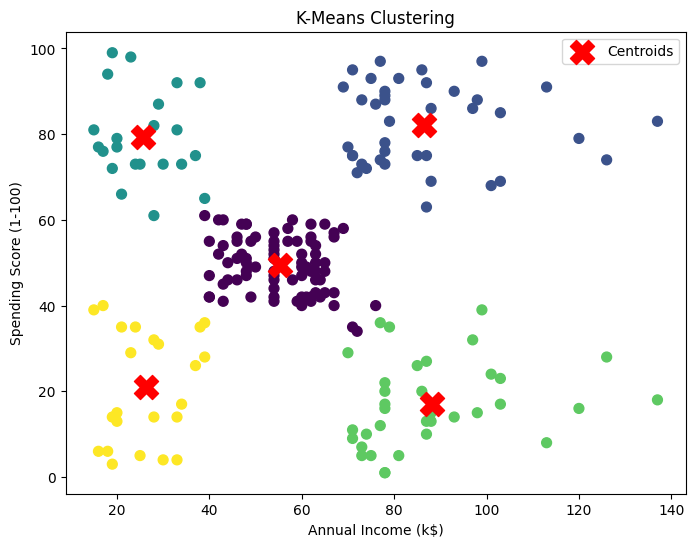

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)  
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [56]:
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


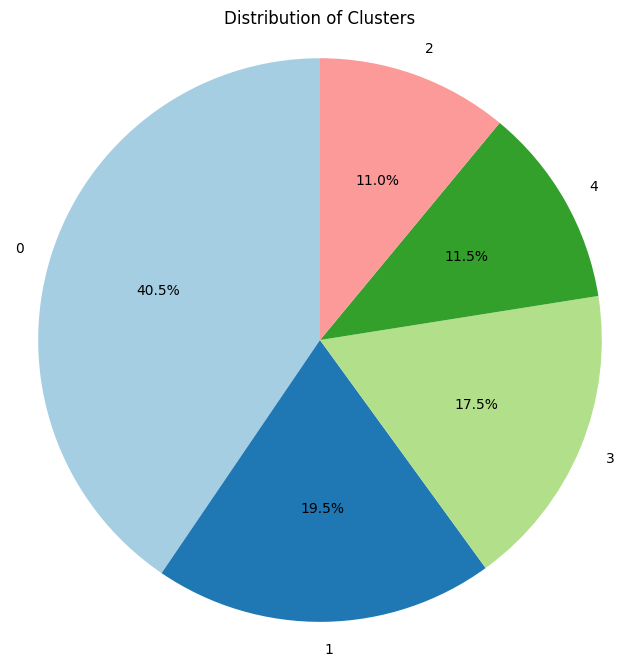

In [57]:
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Clusters')
plt.axis('equal') 
plt.show()

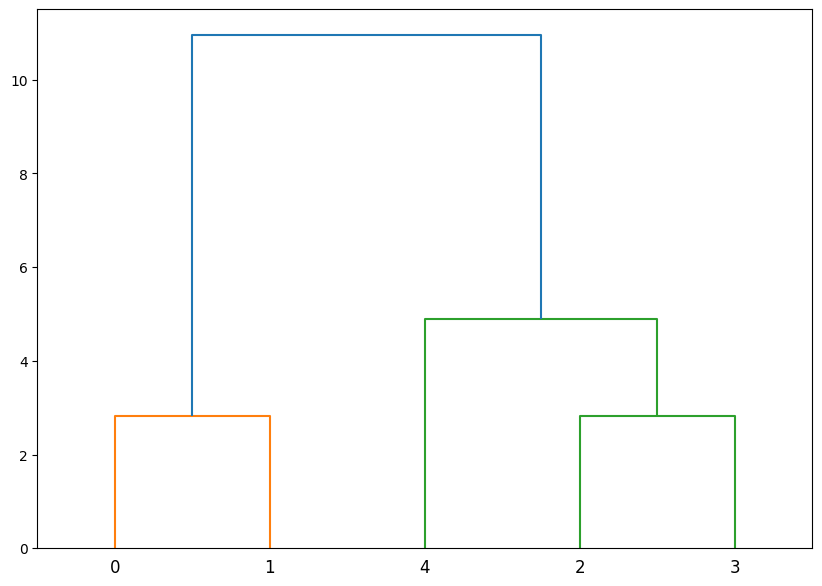

In [59]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Example data (replace X with your dataset)
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]

# Update to use 'metric' instead of 'affinity'
agglom = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Dendrogram for visualization
dendrogram_data = sch.linkage(X, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(dendrogram_data)
plt.show()


## Conclusion:

Purpose and Outcome:

The analysis aimed to segment customers of a mall into distinct groups based on their spending patterns, demographic attributes, and purchasing behavior.
Clustering techniques like K-Means and Hierarchical Clustering were utilized to identify customer groups with similar traits.
Insights from Clustering:

The K-Means algorithm identified distinct clusters of customers, optimized by selecting the ideal number of clusters using the Elbow Method.
Hierarchical Clustering provided another perspective, helping validate the customer segments identified by K-Means.
Each cluster was visualized, highlighting key features like:
Spending scores.
Annual income.
Age distribution within clusters.
Key Observations:

Certain groups of customers were identified as high spenders, making them prime targets for premium offers or loyalty programs.
Other groups had lower spending scores, suggesting potential for improvement through targeted promotions or engagement.
Clear distinctions in income and age demographics were observed across clusters, providing actionable insights for personalized marketing strategies.
Applications:

The segmentation results can guide business decisions such as:
Developing tailored marketing campaigns.
Designing targeted loyalty programs.
Allocating resources more effectively to customer groups with the highest ROI potential.
Limitations and Future Scope:

The dataset used for segmentation was relatively simple, with limited features. Adding more behavioral and transactional data could enhance the clustering accuracy.
The current approach relies heavily on numerical attributes. Incorporating categorical features (e.g., location, preferences) could provide richer segmentation.
Further evaluation using metrics like Silhouette Scores or Davies-Bouldin Index could strengthen the assessment of clustering quality.


####